In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)


In [2]:

def generate_data(n_samples=1000):
    """Generate nonlinear classification data"""
    X = np.random.uniform(-3, 3, (n_samples, 2))
    y = np.sin(X[:, 0]) + 0.5 * X[:, 1]**2 + np.random.normal(0, 0.3, n_samples)
    y = (y > np.median(y)).astype(int)  # Convert to binary classes
    return X, y

X, y = generate_data()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [3]:
def test_polynomial_degrees(degrees, X_train, y_train, X_test, y_test):
    """Test different polynomial degrees and record accuracies"""
    train_acc = []
    test_acc = []
    
    for degree in degrees:
        # Create polynomial features + logistic regression pipeline
        model = make_pipeline(
            PolynomialFeatures(degree=degree, include_bias=False),
            LogisticRegression(max_iter=1000, random_state=42)
        )
        
        model.fit(X_train, y_train)
        
        # Record accuracies
        train_acc.append(accuracy_score(y_train, model.predict(X_train)))
        test_acc.append(accuracy_score(y_test, model.predict(X_test)))
        
        print(f"Degree {degree}:")
        print(f"  Train Accuracy = {train_acc[-1]:.4f}")
        print(f"  Test Accuracy  = {test_acc[-1]:.4f}")
        print("-"*40)
    
    return train_acc, test_acc

# Test different polynomial degrees
degrees = [1, 3, 10]  # Represents underfitting, good fit, overfitting
train_acc, test_acc = test_polynomial_degrees(degrees, X_train, y_train, X_test, y_test)






Degree 1:
  Train Accuracy = 0.6300
  Test Accuracy  = 0.6267
----------------------------------------
Degree 3:
  Train Accuracy = 0.9543
  Test Accuracy  = 0.9267
----------------------------------------
Degree 10:
  Train Accuracy = 0.9500
  Test Accuracy  = 0.8867
----------------------------------------


c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


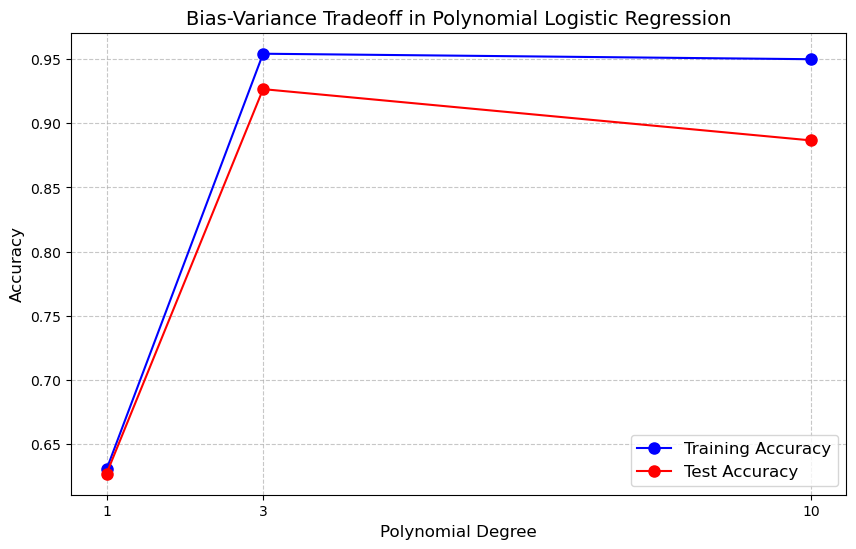

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_acc, 'bo-', label='Training Accuracy', markersize=8)
plt.plot(degrees, test_acc, 'ro-', label='Test Accuracy', markersize=8)
plt.xlabel("Polynomial Degree", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Bias-Variance Tradeoff in Polynomial Logistic Regression", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(degrees)
plt.show()

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


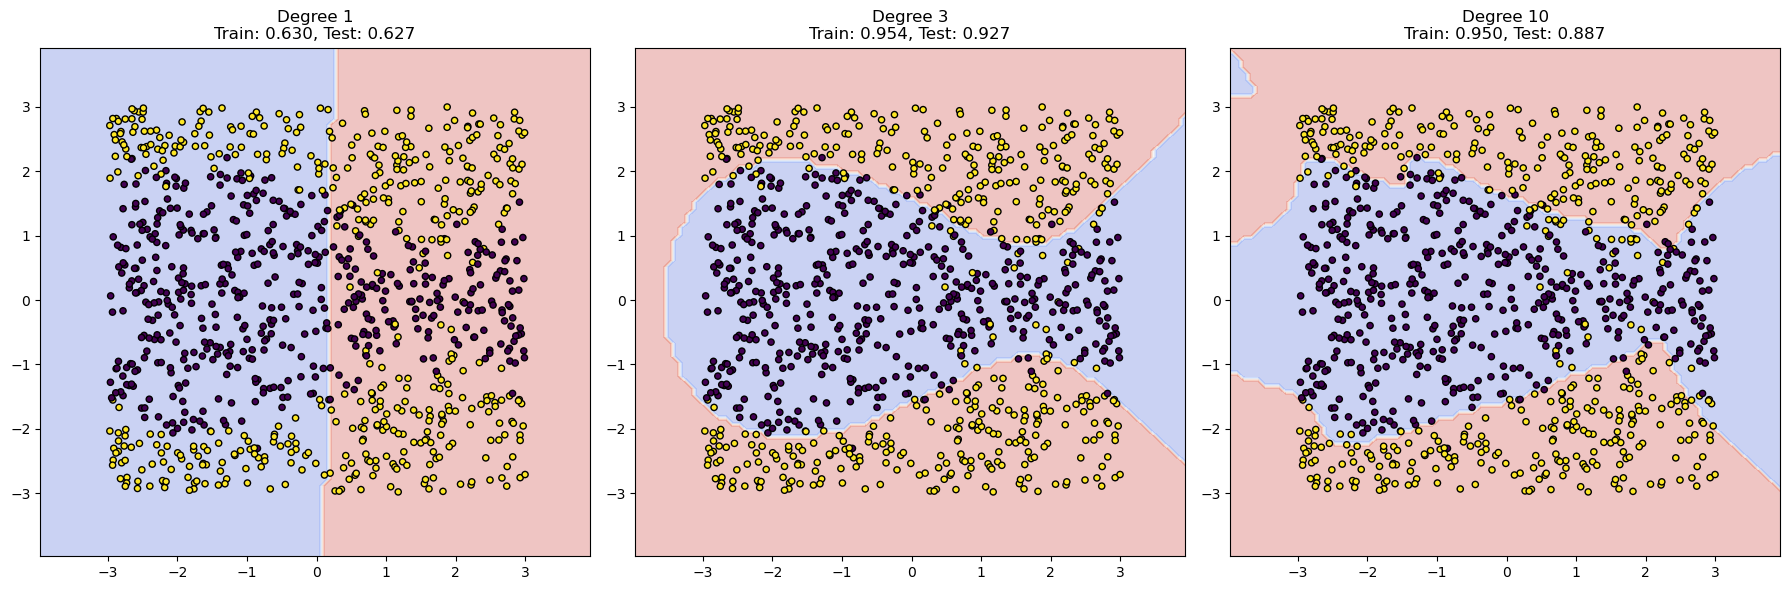

In [5]:

def plot_decision_boundary(degree, ax):
    """Plot decision boundary for given polynomial degree"""
    model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LogisticRegression(max_iter=1000, random_state=42)
    )
    model.fit(X_train, y_train)
    
    # Create mesh grid
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    ax.set_title(f"Degree {degree}\nTrain: {train_acc:.3f}, Test: {test_acc:.3f}")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, degree in enumerate(degrees):
    plot_decision_boundary(degree, axes[i])
plt.tight_layout()
plt.show()

In [18]:
extreme_degrees = [15, 20]
print("\nTesting Extreme Degrees (Overfitting Demonstration):")
_ = test_polynomial_degrees(extreme_degrees, X_train, y_train, X_test, y_test)


Testing Extreme Degrees (Overfitting Demonstration):
Degree 15:
  Train Accuracy = 0.9414
  Test Accuracy  = 0.9033
----------------------------------------
Degree 20:
  Train Accuracy = 0.8629
  Test Accuracy  = 0.8200
----------------------------------------


c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 